# Is someone in a high-income or low-income area more likely to benefit from the California Solar Incentive?



# Combine CSI Working Data Set and Income by Zip Code 2006-2010

# Upload the CSI Working Dataset

In [1]:
import pandas as pd
zip_income=pd.read_csv("Downloads/CSI_Working_Data_Set_Key.csv")
zip_income["Mean"].values
zip_income
pge_df=pd.read_csv("Downloads/Interconnected_Project_Sites_Dataset_2020-06-30/PGE_Interconnected_Project_Sites_Dataset_2020-06-30.csv"
           )
sce_df= pd.read_csv("Downloads/Interconnected_Project_Sites_Dataset_2020-06-30/SCE_Interconnected_Project_Sites_Dataset_2020-06-30.csv")

sdge_df= pd.read_csv("Downloads/Interconnected_Project_Sites_Dataset_2020-06-30/SDGE_Interconnected_Project_Sites_Dataset_2020-06-30.csv")

interconnected_ds=(sdge_df.append(sce_df)).append(pge_df)
interconnected_ds

/opt/anaconda3/envs/mrtl_env_from-history/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (13,14,15,29,32,36,37,40,41,53,54,56,57,59,60,62,63,65,66,68,69,71,72,74,75,86,87,89,90,92,93,95,96,98,99,101,102,104,105,107,108,110,111,113,114,116,117,119,120,122,123,125,126,128,129) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/envs/mrtl_env_from-history/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (13,32,42,53,54,56,57,62,63,65,66,68,69,71,72,74,75,77,78,80,81,83,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/envs/mrtl_env_from-history/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (13,14,15,16,29,30,32,35,36,37,53,54,56,57,59,60,74,75,77,78,80,81,83,8

,Application Id,Matched CSI Application Number,Application Status,Utility,Service City,Service Zip,Service County,Technology Type,System Size DC,System Size AC,...,Inverter Quantity 15,Inverter Model 16,Inverter Manufacturer 16,Inverter Quantity 16,Inverter Model 17,Inverter Manufacturer 17,Inverter Quantity 17,Inverter Model 18,Inverter Manufacturer 18,Inverter Quantity 18
0,SDGE-INT-1,NaN,Interconnected,SDGE,WARNER SPRINGS,92086.0,SAN DIEGO,Solar,2.500,2.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SDGE-INT-10,NaN,Interconnected,SDGE,SAN DIEGO,92123.0,SAN DIEGO,Solar,1.500,1.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SDGE-INT-100,NaN,Interconnected,SDGE,SAN DIEGO,92117.0,SAN DIEGO,Solar,3.200,3.200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SDGE-INT-1000,NaN,Interconnected,SDGE,SAN DIEGO,92127.0,SAN DIEGO,Solar,5.700,5.700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SDGE-INT-10000,SD-CSI-04621,Interconnected,SDGE,SANTA YSABEL,92070.0,SAN DIEGO,Solar,6.800,6.800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492095,PGE-INT-119219300,NaN,Interconnected,PGE,NaN,NaN,CONTRA COSTA,Storage,8.468,8.389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492096,PGE-INT-119219572,NaN,Interconnected,PGE,CHICO,95973.0,BUTTE,Solar PV,11.226,10.855,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492097,PGE-INT-119221179,PGE-CSI-52042,Interconnected,PGE,STOCKTON,95207.0,SAN JOAQUIN,Solar PV,8.146,7.856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492098,PGE-INT-119222411,PGE-CSI-46154,Interconnected,PGE,FRESNO,93720.0,FRESNO,Solar PV,8.133,7.859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Combine the Geo Dataset with the CSI Working Data Set

In [2]:

def removeStr(string):
    if string[0]!=".":
        string= string.replace(",","")
       
      
        #print(float(string.replace(",","")))
        return float(string)

zip_income["Mean2"]=zip_income["Mean"].apply(removeStr)
zip_income["Mean2"]
zip_income["Median2"]=zip_income["Median"].apply(removeStr)

geo_dataset=pd.read_csv("Downloads/WorkingDataSet_5-28-2020.csv")

csi_working_income_first=pd.merge(zip_income, geo_dataset,left_on="Zip",right_on="Host Customer Physical Zip Code")


csi_working_income_first.columns = [c.replace(' ', '_') for c in csi_working_income_first.columns]



csi_working_income_first["Application_Number"].value_counts().to_frame().sort_values(
    "Application_Number",ascending=True)
csi_working_income_first

/opt/anaconda3/envs/mrtl_env_from-history/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (27,29,42,43,51,52,53,54,55,56,57,60,61,62,63,64,65,66,80,81,82,83,84,90,91,92,93,94) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Zip,Median,Mean,Pop,Unnamed:_4,Mean2,Median2,Application_Number,Program_Administrator,Program,...,CEC_PTC_Rating_Single-Axis_Tracking,CEC_PTC_Rating_Dual-Axis_Tracking,CSI_Rating_Fixed,CSI_Rating_Single-Axis_Tracking,CSI_Rating_Dual-Axis_Tracking,MASH_Track_1A_Incentive_Amount,MASH_Track_1B_Incentive_Amount,MASH_Track_2_Incentive_Amount,MASH_Track_1A_%_Capacity,MASH_Track_1B_%_Capacity
0,90001,"34,350","43,940","57,110",NaN,43940.0,34350.0,20484,GRID Alternatives,Single-family Affordable Solar Homes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90001,"34,350","43,940","57,110",NaN,43940.0,34350.0,23488,GRID Alternatives,Single-family Affordable Solar Homes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90001,"34,350","43,940","57,110",NaN,43940.0,34350.0,08251,GRID Alternatives,Single-family Affordable Solar Homes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90001,"34,350","43,940","57,110",NaN,43940.0,34350.0,SCE-CSI-64483,SCE,Small Commercial (< 10 kW) and All Residential,...,0.0,0.0,6.423,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,90001,"34,350","43,940","57,110",NaN,43940.0,34350.0,SCE-CSI-15124,SCE,Small Commercial (< 10 kW) and All Residential,...,0.0,0.0,32.655,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173526,96096,"43,364","64,936",695,NaN,64936.0,43364.0,PGE-CSI-66008,PG&E,Small Commercial (< 10 kW) and All Residential,...,0.0,0.0,4.797,0.0,0.0,NaN,NaN,NaN,NaN,NaN
173527,96137,"51,680","67,927","3,297",NaN,67927.0,51680.0,PGE-CSI-07952,PG&E,Small Commercial (< 10 kW) and All Residential,...,0.0,0.0,3.613,0.0,0.0,NaN,NaN,NaN,NaN,NaN
173528,96137,"51,680","67,927","3,297",NaN,67927.0,51680.0,PGE-CSI-38582,PG&E,Small Commercial (< 10 kW) and All Residential,...,0.0,0.0,4.509,0.0,0.0,NaN,NaN,NaN,NaN,NaN
173529,96137,"51,680","67,927","3,297",NaN,67927.0,51680.0,PGE-CSI-24791,PG&E,Small Commercial (< 10 kW) and All Residential,...,0.0,0.0,5.865,0.0,0.0,NaN,NaN,NaN,NaN,NaN


# Number of rows in CSI working dataset

In [3]:
len(csi_working_income_first)

173531

# Number of rows in interconnected_ds


In [4]:
len(interconnected_ds)

1046445

# Each application number appears once in the Working Dataset

In [5]:
csi_working_income_first["Application_Number"].value_counts()

SCE-CSI-09194    1
SCE-CSI-39022    1
SD-CSI-10300     1
SCE-CSI-16929    1
SD-CSI-13254     1
                ..
SCE-CSI-57090    1
SCE-CSI-00638    1
SCE-CSI-29590    1
SCE-CSI-22077    1
SCE-CSI-06012    1
Name: Application_Number, Length: 173531, dtype: int64

# Combine the Interconnected dataset with the CSI working dataset



In [6]:

csi_working_income = pd.merge(csi_working_income_first,interconnected_ds, 
                              right_on=["Matched CSI Application Number"],
                              left_on = ['Application_Number'])
csi_working_income

,Zip,Median,Mean,Pop,Unnamed:_4,Mean2,Median2,Application_Number,Program_Administrator,Program,...,Inverter Quantity 15,Inverter Model 16,Inverter Manufacturer 16,Inverter Quantity 16,Inverter Model 17,Inverter Manufacturer 17,Inverter Quantity 17,Inverter Model 18,Inverter Manufacturer 18,Inverter Quantity 18
0,90001,"34,350","43,940","57,110",NaN,43940.0,34350.0,SCE-CSI-64483,SCE,Small Commercial (< 10 kW) and All Residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90001,"34,350","43,940","57,110",NaN,43940.0,34350.0,SCE-CSI-24553,SCE,Large Commercial (>= 10 kW),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90001,"34,350","43,940","57,110",NaN,43940.0,34350.0,SCE-CSI-24594,SCE,Large Commercial (>= 10 kW),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90001,"34,350","43,940","57,110",NaN,43940.0,34350.0,SCE-CSI-08621,SCE,Small Commercial (< 10 kW) and All Residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90001,"34,350","43,940","57,110",NaN,43940.0,34350.0,SCE-MASH-00168,SCE,Multifamily Affordable Solar Housing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127335,96096,"43,364","64,936",695,NaN,64936.0,43364.0,PGE-CSI-11393,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127336,96096,"43,364","64,936",695,NaN,64936.0,43364.0,PGE-CSI-65001,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127337,96096,"43,364","64,936",695,NaN,64936.0,43364.0,PGE-CSI-66008,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127338,96137,"51,680","67,927","3,297",NaN,67927.0,51680.0,PGE-CSI-07952,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#    Since the resulting dataframe contains 127340 rows and the Interconnected dataset originally had 127689 unique rows, this means there are 349 IDs that are in the Interconnected DS are not in the CSI working dataset

# Divide the Incentive Amount and the Total Cost by the System Size
# Create the low,middle, and high income dataset

In [7]:


csi_working_income = pd.merge(csi_working_income_first,interconnected_ds, 
                              right_on=["Matched CSI Application Number"],
                              left_on = ['Application_Number'])
csi_working_income

csi_working_income["ia_system_size"]=(csi_working_income["Incentive_Amount"]/
                                      csi_working_income["System Size DC"])
csi_working_income["tc_system_size_dc"]=(csi_working_income["Total_Cost"]/
                                      csi_working_income["System Size DC"])
csi_working_income["tc_system_size_ac"]=(csi_working_income["Total_Cost"]/
                                      csi_working_income["System Size AC"])

csi_working_income["ia_system_size_ac"]=(csi_working_income["Incentive_Amount"]/
                                      csi_working_income["System Size AC"])


csi_working_income["ratio_ac"]=csi_working_income["ia_system_size_ac"]/csi_working_income["tc_system_size_ac"]
csi_working_income["ratio_dc"]=csi_working_income["ia_system_size"]/csi_working_income["tc_system_size_dc"]
csi_working_income["ratio"]=csi_working_income["Incentive_Amount"]/csi_working_income["Total_Cost"]

#per website documentation, these values indicate missing data, so these values are removed
csi_working_income=csi_working_income[csi_working_income["Mean2"]!=-7777.0]
csi_working_income=csi_working_income[csi_working_income["Mean2"]!=-8888.0]
csi_working_income=csi_working_income[csi_working_income["Mean2"]!=-9999.0]


#create another column, with low, middle, high income 



# Create a column that contains the income group

# The lowest 30% of people were low-income. Then middle income group would be 30-70% and high income would be 70-100%


In [8]:
csi_working_income_first["Application_Number"].value_counts()

SCE-CSI-09194    1
SCE-CSI-39022    1
SD-CSI-10300     1
SCE-CSI-16929    1
SD-CSI-13254     1
                ..
SCE-CSI-57090    1
SCE-CSI-00638    1
SCE-CSI-29590    1
SCE-CSI-22077    1
SCE-CSI-06012    1
Name: Application_Number, Length: 173531, dtype: int64

In [9]:
csi_working_income=csi_working_income.sort_values(by="Mean2", ascending=True)
middle=(["Middle"]*(int(len(csi_working_income["Mean2"])*.70)-
                    int(len(csi_working_income["Mean2"])*.30)))


In [10]:
middle=(["Middle"]*(int(len(csi_working_income["Mean2"])*.70)-
                    int(len(csi_working_income["Mean2"])*.30)))
high=(["High"]*((int(len(csi_working_income["Mean2"])))-
                (int(len(csi_working_income["Mean2"])*.70))))

In [11]:

csi_working_income["Income_Group"]=(["Low"]*int(len(csi_working_income["Mean2"])*.30))+middle+high


In [12]:
low=csi_working_income[:int(len(csi_working_income["Mean2"])*.30)]
low
middle=csi_working_income[int(len(csi_working_income["Mean2"])*.30):
                          int(len(csi_working_income["Mean2"])*.70)]

middle

high=csi_working_income[int(len(csi_working_income["Mean2"])*.70):]

high

,Zip,Median,Mean,Pop,Unnamed:_4,Mean2,Median2,Application_Number,Program_Administrator,Program,...,Inverter Manufacturer 18,Inverter Quantity 18,ia_system_size,tc_system_size_dc,tc_system_size_ac,ia_system_size_ac,ratio_ac,ratio_dc,ratio,Income_Group
95974,94551,"91,402","108,326","36,867",NaN,108326.0,91402.0,PGE-CSI-65203,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,NaN,181.698486,5322.251481,5565.920826,190.017212,0.034139,0.034139,0.034139,High
95973,94551,"91,402","108,326","36,867",NaN,108326.0,91402.0,PGE-CSI-61792,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,NaN,182.000000,5777.777778,6010.171059,189.320388,0.031500,0.031500,0.031500,High
95972,94551,"91,402","108,326","36,867",NaN,108326.0,91402.0,PGE-CSI-66096,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,NaN,187.437437,4944.371872,5105.351421,193.540052,0.037909,0.037909,0.037909,High
95971,94551,"91,402","108,326","36,867",NaN,108326.0,91402.0,PGE-CSI-16338,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,NaN,1434.210526,8472.288676,8883.152174,1503.762542,0.169283,0.169283,0.169283,High
95970,94551,"91,402","108,326","36,867",NaN,108326.0,91402.0,PGE-CSI-01388,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,NaN,2246.900826,7978.650138,8398.985017,2365.273079,0.281614,0.281614,0.281614,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85817,94027,"216,905","336,888","7,089",NaN,336888.0,216905.0,PGE-CSI-18899,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,NaN,940.225857,17515.381620,18385.244226,986.920090,0.053680,0.053680,0.053680,High
85816,94027,"216,905","336,888","7,089",NaN,336888.0,216905.0,PGE-CSI-17809,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,NaN,1336.990596,7111.912226,7425.578922,1395.957778,0.187993,0.187993,0.187993,High
85815,94027,"216,905","336,888","7,089",NaN,336888.0,216905.0,PGE-CSI-29934,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,NaN,525.517241,9674.088670,10103.097026,548.821895,0.054322,0.054322,0.054322,High
85824,94027,"216,905","336,888","7,089",NaN,336888.0,216905.0,PGE-CSI-33073,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,NaN,601.943598,7216.272866,7595.467308,633.574007,0.083415,0.083415,0.083415,High


In [13]:
csi_working_income['Income_Group']

117987     Low
117986     Low
117985     Low
126056     Low
126042     Low
          ... 
85817     High
85816     High
85815     High
85824     High
85810     High
Name: Income_Group, Length: 127340, dtype: object

# Create a new Column for Ratio of Incentive Amount to Total Cost

In [14]:

csi_working_income=csi_working_income[csi_working_income["Total_Cost"]!=0]
csi_working_income["Incentive_Total_Cost"]=csi_working_income["Incentive_Amount"]/csi_working_income["Total_Cost"]
csi_working_income["Incentive_Total_Cost"]





117987    0.192677
117986    0.181758
117985    0.076311
126056    0.040292
126042    0.029661
            ...   
85817     0.053680
85816     0.187993
85815     0.054322
85824     0.083415
85810     0.049580
Name: Incentive_Total_Cost, Length: 127331, dtype: float64

# Why are some of the IDs in the "Matched CSI Application Number" column repeated? and does this affect Residential buildings? 


# After I combined the Interconnected dataset with the CSI working dataset, the repetitive rows were found in the Residential groups

# Once I used the drop_duplicates function on the data frame, i realized that none of the rows were completley the same because the result of applying this function to the table was the same number of rows as the original table. There are multiple rows that only differ on th Application ID, System Size, and more 

# In order to ensure that none of the rows were completely the same, I created a list of all the IDs that appear more than once

In [15]:
(csi_working_income[csi_working_income["System_Owner_Sector"]==
                    "Residential"])["Matched CSI Application Number"].value_counts()

PGE-CSI-33410    24
PGE-CSI-06803    12
SCE-CSI-25016     4
SD-CSI-07417      2
SD-CSI-05061      2
                 ..
SCE-CSI-29685     1
SD-CSI-03301      1
PGE-CSI-33148     1
SCE-CSI-55772     1
SCE-CSI-69208     1
Name: Matched CSI Application Number, Length: 83181, dtype: int64

In [16]:
csi_working_income[csi_working_income["Application_Number"]=='PGE-CSI-33410']["Total_Cost"]

88985    13850.0
88976    13850.0
88975    13850.0
88974    13850.0
88973    13850.0
88972    13850.0
88971    13850.0
88977    13850.0
88970    13850.0
88968    13850.0
88967    13850.0
88966    13850.0
88965    13850.0
88964    13850.0
88969    13850.0
88978    13850.0
88980    13850.0
88979    13850.0
88986    13850.0
88984    13850.0
88983    13850.0
88982    13850.0
88981    13850.0
88987    13850.0
Name: Total_Cost, dtype: float64



# *Application Id Definition: Unique identifier for each interconnection request (application)

# *Matched CSI Application Number Definition: Matched CSI application Id from the CSI Working Data Set



In [17]:

csi_working_income["ia_system_size"]=(csi_working_income["Incentive_Amount"]/
                                      csi_working_income["System Size DC"])
csi_working_income["tc_system_size_dc"]=(csi_working_income["Total_Cost"]/
                                      csi_working_income["System Size DC"])
csi_working_income["tc_system_size_ac"]=(csi_working_income["Total_Cost"]/
                                      csi_working_income["System Size AC"])

csi_working_income["ia_system_size_ac"]=(csi_working_income["Incentive_Amount"]/
                                      csi_working_income["System Size AC"])


csi_working_income["ratio_ac"]=csi_working_income["ia_system_size_ac"]/csi_working_income["tc_system_size_ac"]
csi_working_income["ratio_dc"]=csi_working_income["ia_system_size"]/csi_working_income["tc_system_size_dc"]
csi_working_income["ratio"]=csi_working_income["Incentive_Amount"]/csi_working_income["Total_Cost"]



df_residential=(csi_working_income[csi_working_income["System_Owner_Sector"]=="Residential"])


lst1=list(df_residential[df_residential["Matched CSI Application Number"]=='PGE-CSI-33410'].iloc[0].values)


lst3=list(df_residential[df_residential["Matched CSI Application Number"]=='PGE-CSI-33410'].iloc[3].values)


     

In [18]:
#get the index of the first Application Number that is not repeated......
first_1=list((csi_working_income[csi_working_income["System_Owner_Sector"]==
                                 "Residential"])
             ["Matched CSI Application Number"].value_counts().values).index(1)

first_1





57

# As a result, the final dataframe only contains unique CSI Application Numbers because out of the rows that contained repeated application IDs, there was one row that contained the total incentive amount and total cost for that specific application. 

In [19]:
#list of all the repeated  CSI Application Numbers
id_repeats=list((df_residential["Matched CSI Application Number"].value_counts().index)[:57])

diff_val_col=[]
ids_list=[]
for app_id in id_repeats:
    count=0
    
    new_df=df_residential[df_residential["Matched CSI Application Number"]==app_id]
    delete_index=list(new_df.index)
    df_residential=df_residential.drop(delete_index)
    
    
    #the row with the greatest val
    #get the index of the row that we want
    max_index=list(new_df["System Size DC"].values).index(max(list(new_df["System Size DC"].values)))
    #replace all of the repeated rows with a single row
    df_residential=df_residential.append((new_df.iloc[max_index]).to_dict(),ignore_index=True)
   
                
                


In [20]:
df_residential["Matched CSI Application Number"].value_counts()

SD-CSI-10330     1
SCE-CSI-74163    1
SCE-CSI-23642    1
PGE-CSI-02326    1
SCE-CSI-36152    1
                ..
SCE-CSI-37832    1
SCE-CSI-47177    1
PGE-CSI-04523    1
SCE-CSI-21318    1
SCE-CSI-69208    1
Name: Matched CSI Application Number, Length: 83181, dtype: int64

In [21]:
df_residential

,Zip,Median,Mean,Pop,Unnamed:_4,Mean2,Median2,Application_Number,Program_Administrator,Program,...,Inverter Quantity 18,ia_system_size,tc_system_size_dc,tc_system_size_ac,ia_system_size_ac,ratio_ac,ratio_dc,ratio,Income_Group,Incentive_Total_Cost
0,95485,"3,515","4,042",287,NaN,4042.0,3515.0,PGE-CSI-04091,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,1944.000000,10089.440000,10733.446809,2068.085106,0.192677,0.192677,0.192677,Low,0.192677
1,95485,"3,515","4,042",287,NaN,4042.0,3515.0,PGE-CSI-04942,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,1852.308917,10191.082803,11262.648482,2047.074351,0.181758,0.181758,0.181758,Low,0.181758
2,95485,"3,515","4,042",287,NaN,4042.0,3515.0,PGE-CSI-30301,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,576.174112,7550.297824,8033.406459,613.040829,0.076311,0.076311,0.076311,Low,0.076311
3,95971,"3,363","4,521",470,NaN,4521.0,3363.0,PGE-CSI-39445,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,303.921569,7543.067227,7545.709282,304.028021,0.040292,0.040292,0.040292,Low,0.040292
4,95971,"3,363","4,521",470,NaN,4521.0,3363.0,PGE-CSI-62931,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,160.928433,5425.531915,5649.546828,167.573011,0.029661,0.029661,0.029661,Low,0.029661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83176,93012,"95,670","113,336","34,617",NaN,113336.0,95670.0,SCE-CSI-66123,SCE,Small Commercial (< 10 kW) and All Residential,...,NaN,185.324127,4491.948600,4583.621020,189.106252,0.041257,0.041257,0.041257,High,0.041257
83177,94109,"59,205","86,481","55,984",NaN,86481.0,59205.0,PGE-CSI-29213,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,591.469194,11611.374408,12092.793682,615.992103,0.050939,0.050939,0.050939,Middle,0.050939
83178,95692,"60,425","66,169","4,769",NaN,66169.0,60425.0,PGE-CSI-43381,PG&E,Small Commercial (< 10 kW) and All Residential,...,NaN,217.621348,6434.207499,6750.211174,228.309400,0.033823,0.033823,0.033823,Low,0.033823
83179,92004,"45,489","51,094","3,881",NaN,51094.0,45489.0,SD-CSI-09669,CSE,Small Commercial (< 10 kW) and All Residential,...,NaN,285.080645,4525.403226,5349.380362,336.987607,0.062996,0.062996,0.062996,Low,0.062996


# Ratio of Incentive Amount to Total Cost of the System for each Income Group-System Size

# Analysis: High-Income Groups have a greater Ratio of Incentive Amount to Total Cost

In [22]:
import numpy as np

(df_residential.groupby("Income_Group")["ratio"]).mean(numeric_only=False)



Income_Group
High      0.111280
Low       0.103550
Middle    0.102651
Name: ratio, dtype: float64

In [24]:
df=df_residential
df = df.iloc[::-1]
(df.groupby("Income_Group")["ratio"]).mean(numeric_only=False)

Income_Group
High      0.111280
Low       0.103550
Middle    0.102651
Name: ratio, dtype: float64

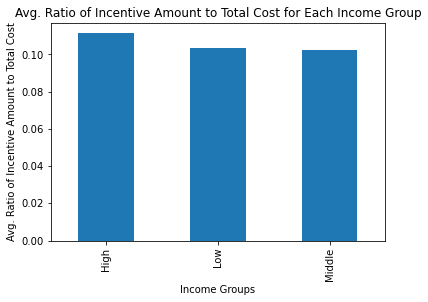

In [23]:
import matplotlib.pyplot as plt
(df_residential.groupby("Income_Group")["ratio"]).mean(
    numeric_only=False).plot.bar()
plt.title('Avg. Ratio of Incentive Amount to Total Cost for Each Income Group')
plt.xlabel('Income Groups')
plt.ylabel('Avg. Ratio of Incentive Amount to Total Cost')
plt.show()

In [24]:
import numpy as np
(df_residential.groupby("Income_Group")["ratio_ac"]).mean(numeric_only=False)

Income_Group
High      0.111262
Low       0.103550
Middle    0.102652
Name: ratio_ac, dtype: float64

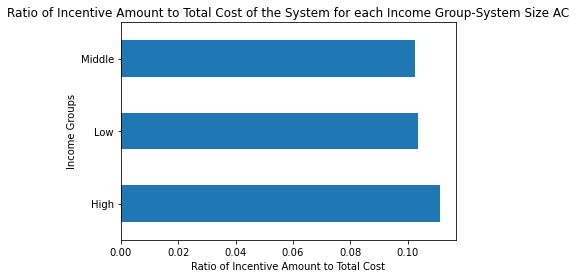

In [25]:

import matplotlib.pyplot as plt
(df_residential.groupby("Income_Group")["ratio_ac"]).mean(
    numeric_only=False).plot.barh()

plt.title('Ratio of Incentive Amount to Total Cost of the System for each Income Group-System Size AC')


plt.ylabel('Income Groups')
plt.xlabel('Ratio of Incentive Amount to Total Cost')
plt.show()



In [26]:
(df_residential.groupby("Income_Group")["ratio_dc"]).mean(
    numeric_only=False)

Income_Group
High      0.111262
Low       0.103550
Middle    0.102652
Name: ratio_dc, dtype: float64

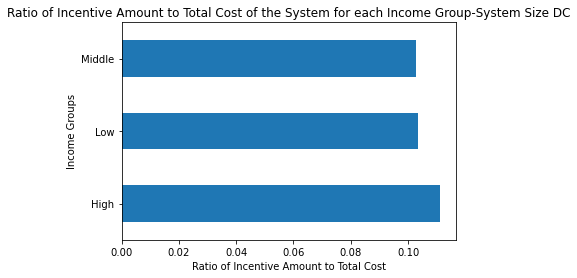

In [27]:
import matplotlib.pyplot as plt
(df_residential.groupby("Income_Group")["ratio_dc"]).mean(
    numeric_only=False).plot.barh()

plt.title('Ratio of Incentive Amount to Total Cost of the System for each Income Group-System Size DC')


plt.ylabel('Income Groups')
plt.xlabel('Ratio of Incentive Amount to Total Cost')
plt.show()

# Analysis: The Residential Buildings in the High-Income Group have the greatest Ratio of Incentive Amount to Total Cost 

# Average Total Cost in Residential Buildings for All Income Zip codes 


# Analysis: The Residential Buildings in the High-Income Group have the greatest Avg. Total Cost

In [28]:
(df_residential.groupby("Income_Group")["Total_Cost"]).mean()

Income_Group
High      38183.090963
Low       35202.327548
Middle    34677.943899
Name: Total_Cost, dtype: float64

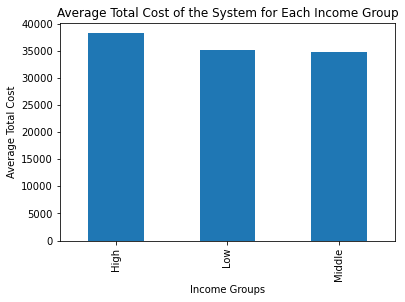

In [29]:
plt.title('Average Total Cost of the System for Each Income Group')
(df_residential.sort_index(ascending=True).groupby("Income_Group")
 ["Total_Cost"]).mean().plot.bar()
plt.ylabel('Average Total Cost')
plt.xlabel('Income Groups')
plt.show()

# Average Incentive Amount in Residential Buildings for All Income Zip codes

#Analysis: The High-Income Residential Buildings have the greatest  Avg. Incentive Amount

In [30]:
(df_residential.groupby("Income_Group")["Incentive_Amount"]).mean()

Income_Group
High      4615.276045
Low       4265.441990
Middle    3960.045920
Name: Incentive_Amount, dtype: float64

Text(0, 0.5, 'Average Incentive Amount')

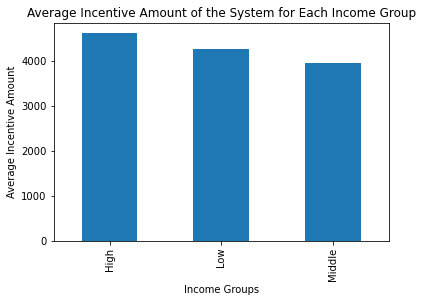

In [31]:
plt.title('Average Incentive Amount of the System for Each Income Group')
(df_residential.groupby("Income_Group")["Incentive_Amount"]).mean().plot.bar()
plt.xlabel('Income Groups')
plt.ylabel('Average Incentive Amount')

# Use 15 min Simulated Interval Dataset
# number of observations, make some plots
    # 61446144 rows
    # Each zip code contains  210433 rows
# Contains data from 1/01/2011 to 12/31/2016 for each zip code
# Outputs the amount of energy every 15 minutes 
# Within 24 hours


In [32]:
import os
import glob
import pandas as pd
os.chdir("/Users/raechelwalker/Downloads/CPR Updated DER Production Database-2/DER Production Database")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
df=pd.concat([pd.read_csv(f) for f in all_filenames ])

In [33]:
zipcode_col=[]
for i in all_filenames:
    zipcode_col+=([i[:5]]*210432)



# capacity factor =mean(energy-kWh) in each 15 minute interval




In [34]:
df["zipcodes"]=zipcode_col
cf_df=pd.DataFrame(df.groupby('zipcodes')["Energy (kWh)"].mean())


# **calculate the capactity factory by multiplying the average mean energy kwh*4

In [35]:
cf_df["Energy (kWh)"]=cf_df["Energy (kWh)"]*4

In [36]:
cf_df["Energy (kWh)"]

zipcodes
90210    0.191448
90230    0.174189
90240    0.188617
90245    0.137626
90254    0.187086
           ...   
95963    0.278157
95965    0.165130
95966    0.206161
96007    0.272937
96073    0.286635
Name: Energy (kWh), Length: 292, dtype: float64

# *Is solar production the same wherever Kw solar panels are installed?
Zipcode with the lowest capacity factor: 95125 (Santa Clara County, California which contains San Jose, CA, Campbell, CA)


In [37]:
row_num=list(cf_df["Energy (kWh)"]).index(cf_df["Energy (kWh)"].min())
list(cf_df.index.values)[row_num]

'95125'

Zipcode with the highest capacity factor:95240(Lodi County, CA in the Bay Area)

In [38]:
row_num=list(cf_df["Energy (kWh)"]).index(cf_df["Energy (kWh)"].max())
list(cf_df.index.values)[row_num]

'95240'

In [39]:

cf_df.reset_index(inplace=True)

In [40]:
cf_df["Energy (kWh)"]

0      0.191448
1      0.174189
2      0.188617
3      0.137626
4      0.187086
         ...   
287    0.278157
288    0.165130
289    0.206161
290    0.272937
291    0.286635
Name: Energy (kWh), Length: 292, dtype: float64

In [41]:
cf_df

,zipcodes,Energy (kWh)
0,90210,0.191448
1,90230,0.174189
2,90240,0.188617
3,90245,0.137626
4,90254,0.187086
...,...,...
287,95963,0.278157
288,95965,0.165130
289,95966,0.206161
290,96007,0.272937


In [42]:
cf_df=cf_df.sort_values("Energy (kWh)",ascending=False)

In [43]:
cf_df

,zipcodes,Energy (kWh)
258,95240,0.315933
282,95694,0.295118
291,96073,0.286635
158,93422,0.285052
271,95607,0.284195
...,...,...
178,94085,0.132327
227,94945,0.128858
284,95762,0.108665
252,95128,0.107965


Beverly Hills is ranked 186

Zipcodes with the Highest to Lowest capacitty factors
1. Lodi, CA
2.95694.0: Winters, Ca: Sacramento
3. 96073.0: near Redding, CA in Nor Cal
4. Atascadero, CA 93422: near San Luis Obispo
5. Capay, CA 95607: near Sacramento
.....



# This tells us the average solar production that you would expect if you have kW solar

Are you incentivizing projects in zipcodes that are more productive or have a higher capacity factor,
which means you get more prodcution for every kw you install?


In [44]:
cf_df=cf_df.astype('float')
cf_df

,zipcodes,Energy (kWh)
258,95240.0,0.315933
282,95694.0,0.295118
291,96073.0,0.286635
158,93422.0,0.285052
271,95607.0,0.284195
...,...,...
178,94085.0,0.132327
227,94945.0,0.128858
284,95762.0,0.108665
252,95128.0,0.107965


In [45]:
cf_df.dtypes

zipcodes        float64
Energy (kWh)    float64
dtype: object

# merge average capacity factor dataset with working dataset:


In [46]:
csi_working_income

csi_cf = pd.merge(csi_working_income,cf_df, right_on=["zipcodes"],left_on=['Zip'])
csi_cf

,Zip,Median,Mean,Pop,Unnamed:_4,Mean2,Median2,Application_Number,Program_Administrator,Program,...,tc_system_size_dc,tc_system_size_ac,ia_system_size_ac,ratio_ac,ratio_dc,ratio,Income_Group,Incentive_Total_Cost,zipcodes,Energy (kWh)
0,93234,"24,305","30,793","6,987",NaN,30793.0,24305.0,PGE-CSI-55541,PG&E,Large Commercial (>= 10 kW),...,3033.615196,3156.338240,291.155674,0.092245,0.092245,0.092245,Low,0.092245,93234.0,0.160859
1,93234,"24,305","30,793","6,987",NaN,30793.0,24305.0,PGE-CSI-55539,PG&E,Large Commercial (>= 10 kW),...,2878.462829,2994.872522,286.680558,0.095724,0.095724,0.095724,Low,0.095724,93234.0,0.160859
2,93234,"24,305","30,793","6,987",NaN,30793.0,24305.0,PGE-CSI-47236,PG&E,Large Commercial (>= 10 kW),...,2910.025201,3034.801059,291.139159,0.095934,0.095934,0.095934,Low,0.095934,93234.0,0.160859
3,93234,"24,305","30,793","6,987",NaN,30793.0,24305.0,PGE-CSI-13533,PG&E,Large Commercial (>= 10 kW),...,6963.395529,7147.823687,2439.233840,0.341255,0.341255,0.341255,Low,0.341255,93234.0,0.160859
4,93234,"24,305","30,793","6,987",NaN,30793.0,24305.0,A-1611,PG&E,Large Commercial (>= 10 kW),...,8017.280164,8483.833156,2427.244694,0.286102,0.286102,0.286102,Low,0.286102,93234.0,0.160859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56049,94027,"216,905","336,888","7,089",NaN,336888.0,216905.0,PGE-CSI-18899,PG&E,Small Commercial (< 10 kW) and All Residential,...,17515.381620,18385.244226,986.920090,0.053680,0.053680,0.053680,High,0.053680,94027.0,0.175715
56050,94027,"216,905","336,888","7,089",NaN,336888.0,216905.0,PGE-CSI-17809,PG&E,Small Commercial (< 10 kW) and All Residential,...,7111.912226,7425.578922,1395.957778,0.187993,0.187993,0.187993,High,0.187993,94027.0,0.175715
56051,94027,"216,905","336,888","7,089",NaN,336888.0,216905.0,PGE-CSI-29934,PG&E,Small Commercial (< 10 kW) and All Residential,...,9674.088670,10103.097026,548.821895,0.054322,0.054322,0.054322,High,0.054322,94027.0,0.175715
56052,94027,"216,905","336,888","7,089",NaN,336888.0,216905.0,PGE-CSI-33073,PG&E,Small Commercial (< 10 kW) and All Residential,...,7216.272866,7595.467308,633.574007,0.083415,0.083415,0.083415,High,0.083415,94027.0,0.175715


# Energy production=system size * capacity factor*8760


In [47]:
hours=8760

In [48]:
csi_cf["energy_prodcution"]=csi_cf["System Size DC"]*csi_cf["Energy (kWh)"]*hours


In [49]:
num_years=15

In [50]:
csi_cf["incentive_kw_hours"]=csi_cf["Incentive_Amount"]/(csi_cf["energy_prodcution"]*num_years)
csi_cf["incentive_kw_hours"]

0        0.013239
1        0.013036
2        0.013208
3        0.112424
4        0.108519
           ...   
56049    0.040722
56050    0.057906
56051    0.022761
56052    0.026071
56053    0.016693
Name: incentive_kw_hours, Length: 56054, dtype: float64

# Are low-income zipcodes sunnier?If so, then we want to build more solar panels there because  low-income zipcodes have more energy.

Answer: Low-income Zipcodes have the greatest capacity factor

In [51]:

middle=(["Middle"]*(int(len(csi_cf["Mean2"])*.70)-int(len(csi_cf["Mean2"])*.30)))

high=(["High"]*((int(len(csi_cf["Mean2"])))-(int(len(csi_cf["Mean2"])*.70))))
csi_cf["Income Group"]=(["Low"]*int(len(csi_cf["Mean2"])*.30))+middle+high



In [52]:
(csi_cf.groupby("Income Group")["Energy (kWh)"]).mean()

Income Group
High      0.189922
Low       0.208530
Middle    0.201503
Name: Energy (kWh), dtype: float64

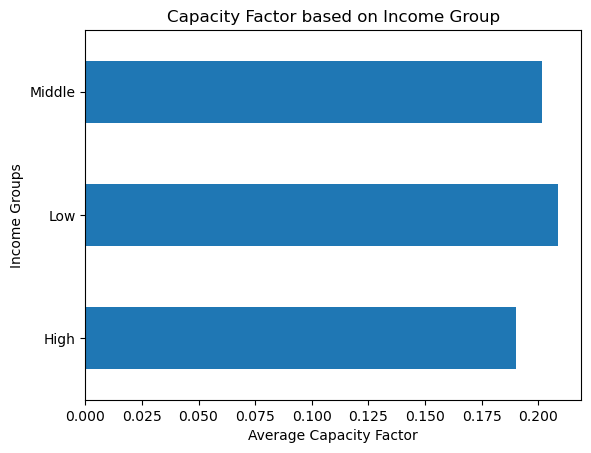

In [53]:


(csi_cf.groupby("Income Group")["Energy (kWh)"]).mean().plot.barh()
plt.title('Capacity Factor based on Income Group')

plt.ylabel('Income Groups')
plt.xlabel('Average Capacity Factor')
plt.show()

# Do low-income zipcodes have better solar production?
# ANSWER: Low Income groups have the greatest energy production



In [54]:

(csi_cf.groupby("Income Group")["energy_prodcution"]).mean()


Income Group
High      11795.261323
Low       22024.710759
Middle    15421.716716
Name: energy_prodcution, dtype: float64

Text(0, 0.5, 'Average Energy Production')

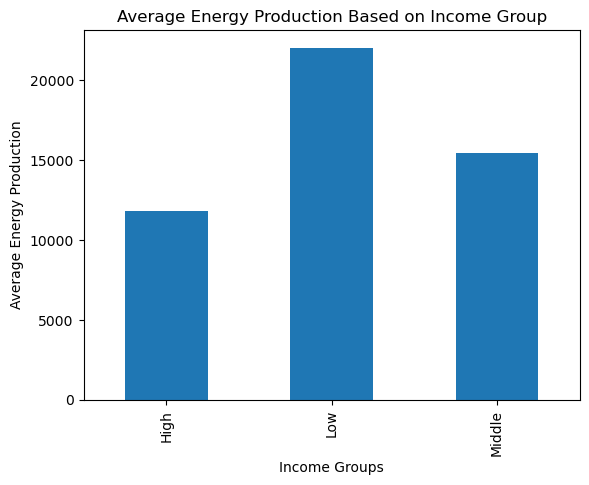

In [55]:
(csi_cf.groupby("Income Group")["energy_prodcution"]).mean().plot.bar()
plt.title('Average Energy Production Based on Income Group')
plt.xlabel('Income Groups')
plt.ylabel('Average Energy Production')




# The High Income Group Receives the greatest incentive amount in terms of kw hours

In [56]:
(csi_cf.groupby("Income Group")["incentive_kw_hours"]).mean()

Income Group
High      0.030174
Low       0.025111
Middle    0.027296
Name: incentive_kw_hours, dtype: float64

Text(0, 0.5, 'Average Incentive In Terms of kw Hours')

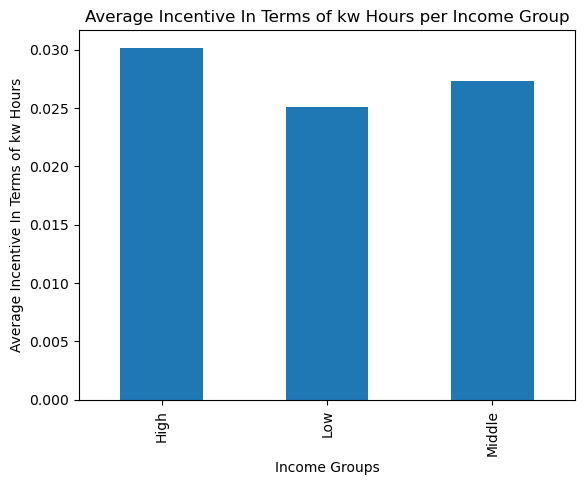

In [57]:
(csi_cf.groupby("Income Group")["incentive_kw_hours"]).mean().plot.bar()
plt.title('Average Incentive In Terms of kw Hours per Income Group')
plt.xlabel('Income Groups')
plt.ylabel('Average Incentive In Terms of kw Hours')



Analysis: We found evidence to reject our hypothesis that the Low-Income Residential Buildings are getting a larger Incentive Amount than High-Income Residential Buildings. Residential Buildings include Single Family homes and Multifamily properties. The High-Income Residential Buildings have the greatest average Incentive Amount. 
Additionally, the Low-Income Systems are less costly than the High-Income Systems.  In order to find the percentage of the total project that is subsidized by the State, we calculated the Incentive Amount divided by the Total Cost.  This analysis helped us understand the fraction of the cost of the System that the state is subsidizing. As a result, the High-Income Groups have a greater Ratio of Incentive Amount to Total Cost. The state is covering a higher fraction of the cost for High-Income Groups. High-Income Zip Codes are receiving higher costs, and they are getting higher incentives after controlling for the size of the system.
Furthermore, there is not a drastic difference in the average ratio of incentive amount to total cost. Despite low-income zip codes having a smaller income than high-income zip codes, high-income zip codes still received a higher subsidy as a percentage of their installation cost. These results align with previous research findings that state there are cases of solar rooftop PV economic benefits disproportionately advantaging higher-income communities. 
